In [ ]:
Cpip install yfinance

In [ ]:
import yfinance as yf

# Define the stock symbol and date range
symbol = 'TSLA'
start_date = '2023-01-01'
end_date = '2024-01-01'

# Retrieve historical stock price data from Yahoo Finance
stock_data = yf.download(symbol, start=start_date, end=end_date)
stock_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


In [ ]:

missing_values = stock_data.isnull().sum()
print("Missing Values:\n", missing_values)


stock_data.dropna(inplace=True)


Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


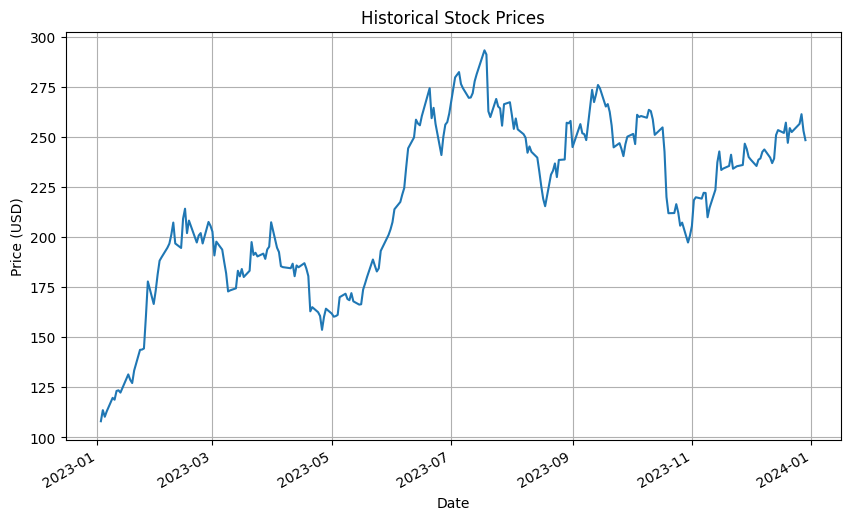

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
stock_data['Close'].plot()
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

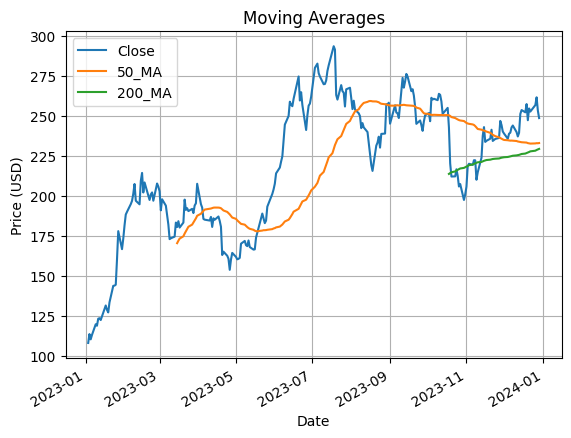

In [ ]:
# Calculate moving averages
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

# Plot moving averages
plt.figure(figsize=(10, 6))
stock_data[['Close', '50_MA', '200_MA']].plot()
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


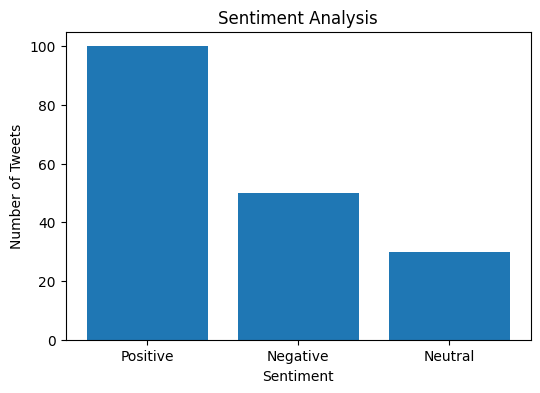

In [ ]:
# Dummy sentiment analysis
# This is just a placeholder and does not perform actual sentiment analysis
positive_tweets = 100
negative_tweets = 50
neutral_tweets = 30

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
plt.bar(['Positive', 'Negative', 'Neutral'], [positive_tweets, negative_tweets, neutral_tweets])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Ensure the features and target variable have the same length
stock_data = stock_data.dropna()  # Drop rows with missing values

# Define features (moving averages) and target variable (closing price)
X = stock_data[['50_MA', '200_MA']].values
y = stock_data['Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 38.8803144573688
